In [53]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
#from plotly.offline import iplot, init_notebook_mode
import requests
import seaborn as sns

import sklearn as skl
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import mean_absolute_error, mean_squared_error
# from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

from itertools import product
from joblib import load

In [54]:
DATA = pd.read_csv('data_main.csv')
DATA['point'] = pd.to_datetime(DATA['point'])
DATA.set_index('point', inplace = True)

DATA['erore'] = DATA['erore'].fillna(0)
DATA.drop('erore', inplace=True, axis=1)

In [55]:
data = DATA.copy()

In [57]:
# загрузка модели
model = tf.keras.models.load_model('auto_model.keras')
STscaler = load('scaler.joblib')

In [58]:
data['delta_wr'] = data['WR'].pct_change() 
data['delta_tg'] = data['tg'].pct_change() 
data['delta_apdex'] = data['apdex'].pct_change() 

data.fillna(0, inplace=True)

In [80]:
start = '2024-04-18 23:44:00'
end = '2024-04-19 21:25:00'
data = data.loc[start:end]

In [87]:

def Get_data(start, end):
    return DATA.copy().loc[start:end]

def load_model():

    model = tf.keras.models.load_model('auto_model.keras')
    STscaler = load('scaler.joblib')
    return model, STscaler

def Feature_Engineering(data):

    data['delta_wr'] = data['WR'].pct_change() 
    data['delta_tg'] = data['tg'].pct_change() 
    data['delta_apdex'] = data['apdex'].pct_change() 
    data.fillna(0, inplace=True)

    return data

def Anomaly(data, model, SC):

    limit = 4.717213602576221
    data_sc = SC.transform(data)

    data_delta = data_sc - model.predict(data_sc)
    data_sc =  pd.DataFrame(SC.inverse_transform(data_sc), columns=data.columns, index=data.index)
    data_delta =  pd.DataFrame(data_delta, index=data.index).abs().sum(axis=1)


    data_is_anomaly = pd.DataFrame(index=data.index)
    data_is_anomaly['Bool'] = data_delta.apply(lambda x: 1 if x>limit else 0)
    data_is_anomaly['ANOMALITY_CHANCE'] = 1 / (1 + np.exp(-data_delta/limit))


    json_result = data_is_anomaly.to_json(orient='records')
    return json_result

def anomaly_pipeline(start, end, limit=4.717213602576221):
    data = Get_data(start, end)
    model, scaler = load_model()
    data = Feature_Engineering(data)
    json_result = Anomaly(data, model, scaler)
    return json_result

start = '2024-04-18 23:44:00'
end = '2024-04-19 21:25:00'
json_result = anomaly_pipeline(start, end)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [89]:
json_result

'[{"Bool":0,"ANOMALITY_CHANCE":0.5183464759},{"Bool":0,"ANOMALITY_CHANCE":0.5289870188},{"Bool":0,"ANOMALITY_CHANCE":0.5667671789},{"Bool":0,"ANOMALITY_CHANCE":0.528174226},{"Bool":0,"ANOMALITY_CHANCE":0.5327691831},{"Bool":0,"ANOMALITY_CHANCE":0.5380248506},{"Bool":0,"ANOMALITY_CHANCE":0.5461726573},{"Bool":0,"ANOMALITY_CHANCE":0.5266117537},{"Bool":0,"ANOMALITY_CHANCE":0.5356988588},{"Bool":0,"ANOMALITY_CHANCE":0.5335024961},{"Bool":0,"ANOMALITY_CHANCE":0.5257201516},{"Bool":0,"ANOMALITY_CHANCE":0.5294674056},{"Bool":0,"ANOMALITY_CHANCE":0.5318016981},{"Bool":0,"ANOMALITY_CHANCE":0.5329613564},{"Bool":0,"ANOMALITY_CHANCE":0.5326833061},{"Bool":1,"ANOMALITY_CHANCE":0.9545973515},{"Bool":1,"ANOMALITY_CHANCE":0.760260299},{"Bool":0,"ANOMALITY_CHANCE":0.6342059631},{"Bool":0,"ANOMALITY_CHANCE":0.5223217515},{"Bool":0,"ANOMALITY_CHANCE":0.5368544878},{"Bool":0,"ANOMALITY_CHANCE":0.5301821334},{"Bool":0,"ANOMALITY_CHANCE":0.5155252675},{"Bool":0,"ANOMALITY_CHANCE":0.534068074},{"Bool":0,"A

<Axes: xlabel='point'>

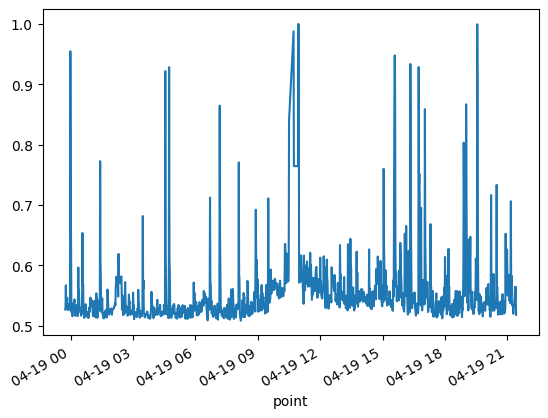

In [70]:
anom_data.plot()

api/web-response-time/ 

api/throughput/

api/apdex/

api/error-rate/



Пример 

api/web-response-time/?start_time=2024-04-16T00:18:00


api/web-response-time/?start_time=2024-04-16T00:18:00&end_time=2024-04-16T00:35:00


In [132]:
response = {
    'wr':'api/web-response-time/',
    'tg':'api/throughput/',
    'apdex': 'api/apdex/'
}
url = "http://26.247.139.91:3000/"
json_list = []

df_combined = pd.DataFrame(columns=['wr', 'tg', 'apdex'])

In [133]:
start = 0
end = 0

In [134]:
import requests
import pandas as pd





In [135]:
for resp in response:
    data = requests.get(url+response[resp])
    if data.status_code == 200:
        json_list.append(data.json())
    else:
        print(f"Ошибка: {data.status_code}")




In [136]:

df_list = []
# Обработка json объектов
for json_data in json_list:
    df_list.append(pd.DataFrame(json_data['data'], columns=['point', 'valye']))

In [145]:
response = {
    'wr':'api/web-response-time/',
    'tg':'api/throughput/',
    'apdex': 'api/apdex/'
}
url = "http://26.247.139.91:3000/"
json_list = []

start = '2024-04-18T23:44:00'
end = '2024-04-19T21:25:00'
for resp in response:
    data = requests.get(url+response[resp]+f'?start_time={start}&end_time={end}')
    if data.status_code == 200:
        json_list.append(data.json())
    else:
        print(f"Ошибка: {data.status_code}")


In [146]:
def g_data(ws, tg, apdex):
    df1 = pd.DataFrame(ws['data'], columns=['point', 'ws'])
    df2 = pd.DataFrame(tg['data'], columns=['point', 'tg'])
    df3 = pd.DataFrame(apdex['data'], columns=['point', 'apdex'])

    result = pd.merge(pd.merge(df1, df2, on='point', how='outer'), df3, on='point', how='outer')
    result['point']=pd.to_datetime(result['point'])
    result.set_index('point', inplace=True)

    return result
   

a = g_data(json_list[0],json_list[1],json_list[2])
a

,ws,tg,apdex
point,,,
2024-04-18 23:44:00,0.006944,3485.0,0.999857
2024-04-18 23:45:00,0.008408,3489.5,0.999284
2024-04-18 23:46:00,0.014217,3545.0,0.998096
2024-04-18 23:47:00,0.014664,3690.0,0.998171
2024-04-18 23:48:00,0.011719,3742.0,0.998931
...,...,...,...
2024-04-19 21:21:00,0.011555,4377.5,0.995431
2024-04-19 21:22:00,0.014040,4355.0,0.993800
2024-04-19 21:23:00,0.014772,4318.0,0.994037


In [143]:
def get_data(start, end):

    DATA = pd.read_csv('data_main.csv')
    DATA['point'] = pd.to_datetime(DATA['point'])
    DATA.set_index('point', inplace = True)

    DATA['erore'] = DATA['erore'].fillna(0)
    DATA.drop('erore', inplace=True, axis=1)
    return DATA.copy().loc[start:end]

a = get_data(
start = '2024-04-18 23:44:00',
end = '2024-04-19 21:25:00')
a


,WR,tg,apdex
point,,,
2024-04-18 23:44:00,0.006944,3485.0,0.999857
2024-04-18 23:45:00,0.008408,3489.5,0.999284
2024-04-18 23:46:00,0.014217,3545.0,0.998096
2024-04-18 23:47:00,0.014664,3690.0,0.998171
2024-04-18 23:48:00,0.011719,3742.0,0.998931
...,...,...,...
2024-04-19 21:21:00,0.011555,4377.5,0.995431
2024-04-19 21:22:00,0.014040,4355.0,0.993800
2024-04-19 21:23:00,0.014772,4318.0,0.994037


In [139]:
wr

<Response [200]>